In [1]:
from Reality import Reality
from Individual import Individual
from Organization import Organization
import matplotlib.pyplot as plt
import numpy as np

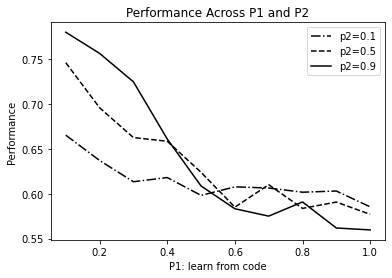

In [3]:
# Figure 1: varying p1 and p2
m = 30
n = 50
p1_list = np.arange(0.1, 1.1, 0.1)
p2_list = [0.1, 0.5, 0.9]
loop = 100
results = []
for p2 in p2_list:
    temp = []
    for p1 in p1_list:
        temp_2 = []
        for _ in range(100):
            reality = Reality(m=m)
            # individual = Individual(m=m, p1=p1, reality=reality)
            organization = Organization(m=m, n=n, p1=p1, p2=p2, reality=reality)
            organization.process(loop=loop)
            temp_2.append(organization.performance_average)
        temp.append(sum(temp_2)/len(temp_2))
    results.append(temp)
x = p1_list
plt.plot(x, results[0], "k-.", label='p2=0.1')
plt.plot(x, results[1], "k--", label='p2=0.5')
plt.plot(x, results[2], "k-", label='p2=0.9')
# plt.savefig("search.jpg")
plt.title('Performance Across P1 and P2')
plt.xlabel('P1: learn from code')
plt.ylabel('Performance')
plt.legend()
plt.show()

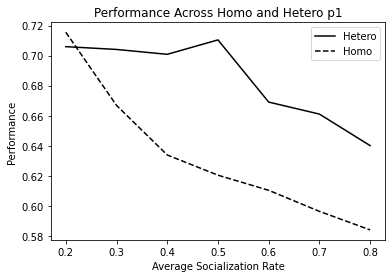

In [9]:
# Heterogeneous vs. Homogeneous Learners
# Figure 1: varying p1 and p2
m = 30
n = 50
p1_list = np.arange(0.2, 0.9, 0.1).tolist()
p2 = 0.5
loop = 100


class Organization(Organization):
    def __init__(self, m=None, n=None, p1=None, p2=None, reality=None, hetero_flag=False):
        self.m = m
        self.n = n
        self.code =[0] * self.m
        self.p1 = p1  # learning from code
        self.p2 = p2  # learning from beliefs
        self.reality = reality
        self.payoff = 0
        self.individuals = []
        if hetero_flag:
            low_learner_num = round((45-50*self.p1)/0.8)
            rapid_learner_num = self.n - low_learner_num
            for i in range(low_learner_num):
                individual = Individual(index=i, m=self.m, p1=0.1, reality=self.reality)
                self.individuals.append(individual)
            for i in range(rapid_learner_num):
                individual = Individual(index=low_learner_num + i, m=self.m, p1=0.9, reality=self.reality)
                self.individuals.append(individual)
        else:
            for i in range(self.n):
                individual = Individual(index=i, m=self.m, p1=self.p1, reality=self.reality)
                self.individuals.append(individual)
        self.superior_group = []

        # DV
        self.performance_curve = []  # the evolution of performance
        self.performance_average = 0  # performance iteration
hetero, homo = [], []
for p1 in p1_list:
    temp = []
    for _ in range(100):
        reality = Reality(m=m)
        # individual = Individual(m=m, p1=p1, reality=reality)
        organization = Organization(m=m, n=n, p1=p1, p2=p2, reality=reality, hetero_flag=True)
        organization.process(loop=loop)
        temp.append(organization.performance_average)
    hetero.append(sum(temp)/len(temp))

for p1 in p1_list:
    temp = []
    for _ in range(100):
        reality = Reality(m=m)
        # individual = Individual(m=m, p1=p1, reality=reality)
        organization = Organization(m=m, n=n, p1=p1, p2=p2, reality=reality, hetero_flag=False)
        organization.process(loop=loop)
        temp.append(organization.performance_average)
    homo.append(sum(temp)/len(temp))
x = p1_list
plt.plot(x, hetero, "k-", label='Hetero')
plt.plot(x, homo, "k--", label='Homo')
# plt.savefig("search.jpg")
plt.title('Performance Across Homo and Hetero p1')
plt.xlabel('Average Socialization Rate')
plt.ylabel('Performance')
plt.legend()
plt.show()

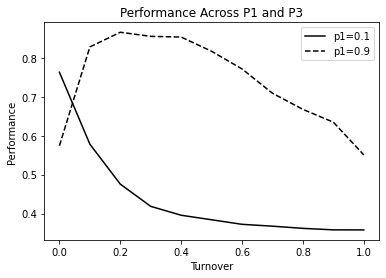

In [3]:
# Figure 4: Personnel Turnover
m = 30
n = 50
p1_list = [0.1, 0.9]
p2 = 0.5
p3_list = np.arange(0, 1.1, 0.1).tolist()
loop = 100
results = []
for p1 in p1_list:
    temp = []
    for p3 in p3_list:
        temp_2 = []
        for _ in range(100):
            reality = Reality(m=m)
            # individual = Individual(m=m, p1=p1, reality=reality)
            organization = Organization(m=m, n=n, p1=p1, p2=p2, reality=reality)
            organization.process(loop=loop, p3=p3)
            temp_2.append(organization.performance_average)
        temp.append(sum(temp_2)/len(temp_2))
    results.append(temp)
x = p3_list
plt.plot(x, results[0], "k-", label='p1=0.1')
plt.plot(x, results[1], "k--", label='p1=0.9')
# plt.savefig("search.jpg")
plt.title('Performance Across P1 and P3')
plt.xlabel('Turnover')
plt.ylabel('Performance')
plt.legend()
plt.show()

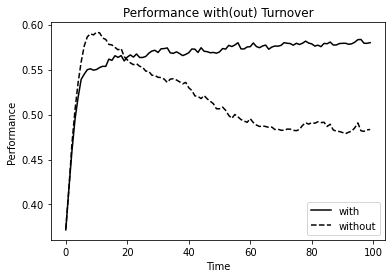

In [3]:
# Environmental Turbulence and Personnel Turnover
m = 30
n = 50
p1 = 0.5
p2 = 0.5
p3_list = [0, 0.1]
p4 = 0.02
loop = 100
results_with_turnover, results_without_turnover = [], []
# without turnover
temp = []
for _ in range(100):  # repeat
    reality = Reality(m=m)
    # individual = Individual(m=m, p1=p1, reality=reality)
    organization = Organization(m=m, n=n, p1=p1, p2=p2, reality=reality)
    organization.process(loop=loop, p3=0, p4=0.02)
    temp.append(organization.performance_curve)
for i in range(100):
    temp_2 = [each_curve[i] for each_curve in temp]
    results_without_turnover.append(sum(temp_2) / len(temp_2))
# with turnover
temp = []
for _ in range(100):  # repeat
    reality = Reality(m=m)
    # individual = Individual(m=m, p1=p1, reality=reality)
    organization = Organization(m=m, n=n, p1=p1, p2=p2, reality=reality)
    organization.process(loop=loop, p3=0.1, p4=0.02)
    temp.append(organization.performance_curve)
for i in range(100):
    temp_2 = [each_curve[i] for each_curve in temp]
    results_with_turnover.append(sum(temp_2) / len(temp_2))

x = range(100)
plt.plot(x, results_with_turnover, "k-", label='with')
plt.plot(x, results_without_turnover, "k--", label='without')
# plt.savefig("search.jpg")
plt.title('Performance with(out) Turnover')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Notes: March said in p.80 that "where there is turbulence without turnover, code knowledge first rises to a moderate level, and then declines to 0, from which it subsequently wanders randomly". In this replication, random walk is consistent with 0.5 payoff, although in March's original paper, this value is 0. The reason is that March use slightly different payoff function where totally wrong element is punished. In other words, (-1, 1) pair gets -1 payoff, (0, 1/-1) pair gets 0 payoff, and correct pair get 1 payoff. However, in this replication, (-1, 1) pair just get 0 payoff. Thus, the random walk herein should converge to 0.5 instead of 0.